# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 1. Обзор библиотеки Pandas</center>

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import absolute_import, division, print_function, unicode_literals

# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [2]:
salaries = pd.Series([400, 300, 200, 250], index=["Andrew", "Bob", "Charles", "Ann"])
print(salaries)

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [3]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [4]:
print(salaries.Andrew == salaries["Andrew"])

True


In [8]:
salaries["Carl"] = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [9]:
salaries.fillna(salaries.median(), inplace=True)

In [10]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Series поддерживает пропуски в данных.**

In [11]:
salaries.c = np.nan  # Series can contain missing values
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [12]:
print("Second element of salaries is", salaries[1], "\n")
# Smart indexing
print(salaries[:3], "\n")
print("There are", len(salaries[salaries > 0]), "positive elements in salaries\n")
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [13]:
df1 = pd.DataFrame(
    np.random.randn(5, 3),
    index=["o1", "o2", "o3", "o4", "o5"],
    columns=["f1", "f2", "f3"],
)
df1

,f1,f2,f3
o1,0.396585,-2.011874,0.436957
o2,-0.093461,-0.177180,0.250941
o3,-0.062155,-0.281854,-0.055640
o4,1.672941,-0.434491,-0.444362
o5,-0.352973,-1.082306,0.381491


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [14]:
df2 = pd.DataFrame(
    {"A": np.random.random(5), 
     "B": ["a", "b", "c", "d", "e"], 
     "C": np.arange(5) > 2}
)
df2

,A,B,C
0,0.872826,a,False
1,0.746052,b,False
2,0.324573,c,False
3,0.445203,d,True
4,0.161487,e,True


**Обращение к элементам (или целым кускам фрейма):**

In [15]:
print("The element in position 3, B is", df2.at[3, "B"], "\n")
print(df2.loc[[1, 4], ["A", "B"]])

The element in position 3, B is d 

          A  B
1  0.746052  b
4  0.161487  e


**Изменение элементов и добавление новых:**

In [16]:
df2.at[2, "B"] = "f"
df2

,A,B,C
0,0.872826,a,False
1,0.746052,b,False
2,0.324573,f,False
3,0.445203,d,True
4,0.161487,e,True


In [17]:
df2.loc[5] = [3.1415, "c", False]
df2

,A,B,C
0,0.872826,a,False
1,0.746052,b,False
2,0.324573,f,False
3,0.445203,d,True
4,0.161487,e,True
5,3.141500,c,False


In [19]:
df1.columns = ["A", "B", "C"]
df3 = df1._append(df2)
df3

,A,B,C
o1,0.396585,-2.011874,0.436957
o2,-0.093461,-0.17718,0.250941
o3,-0.062155,-0.281854,-0.055640
o4,1.672941,-0.434491,-0.444362
o5,-0.352973,-1.082306,0.381491
0,0.872826,a,0.000000
1,0.746052,b,0.000000
2,0.324573,f,0.000000
3,0.445203,d,1.000000
4,0.161487,e,1.000000


#### Обработка пропущенных значений

In [20]:
df1.at["o2", "A"] = np.nan
df1.at["o4", "C"] = np.nan
df1

,A,B,C
o1,0.396585,-2.011874,0.436957
o2,NaN,-0.177180,0.250941
o3,-0.062155,-0.281854,-0.055640
o4,1.672941,-0.434491,NaN
o5,-0.352973,-1.082306,0.381491


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [21]:
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [22]:
df1.dropna(how="any")

,A,B,C
o1,0.396585,-2.011874,0.436957
o3,-0.062155,-0.281854,-0.055640
o5,-0.352973,-1.082306,0.381491


**Пропуски можно заменить каким-то значением.**

In [23]:
df1.fillna(0)

,A,B,C
o1,0.396585,-2.011874,0.436957
o2,0.000000,-0.177180,0.250941
o3,-0.062155,-0.281854,-0.055640
o4,1.672941,-0.434491,0.000000
o5,-0.352973,-1.082306,0.381491


## Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [24]:
df = pd.read_csv("../../data/beauty.csv", sep=";")

**Посмотрим на размер данных и названия признаков.**

In [25]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


In [26]:
df.head(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
6,8.76,12,0,1,0,0,1,0,16,3
7,7.69,5,1,1,0,0,0,0,16,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [27]:
df.head(4)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [28]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [29]:
df.sort_values(by="wage", ascending=False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [30]:
df.sort_values(by=["female", "wage"], ascending=[True, False]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [31]:
df["goodhlth"].mean()

0.9333333333333333

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **На сколько средняя заработная плата мужчин выше средней заработной платы среди женщин?**

In [32]:
df[df["female"] == 1].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3


In [33]:
df[(df["goodhlth"] == 1) & (df["female"] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [34]:
df[(df["female"] == 0)]["wage"].mean() - df[(df["female"] == 1)]["wage"].mean()

3.0694650173688434

**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [35]:
df[(df["female"] == 0) & (df["union"] == 1) & (df["exper"] < 10)]["wage"].max()

12.82

**Применение функции к каждому столбцу:**

In [36]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [37]:
df["looks"].describe()

count    1260.000000
mean        3.185714
std         0.684877
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: looks, dtype: float64

In [38]:
g = df.groupby("looks")
for (i, sub_df) in g:
    print(sub_df["wage"].mean(), sub_df["looks"].mean())

4.621538461538462 1.0
5.3288028169014074 2.0
6.504598337950138 3.0
6.299340659340659 4.0
7.388421052631578 5.0


**Обращение к конкретной группе:**

In [39]:
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

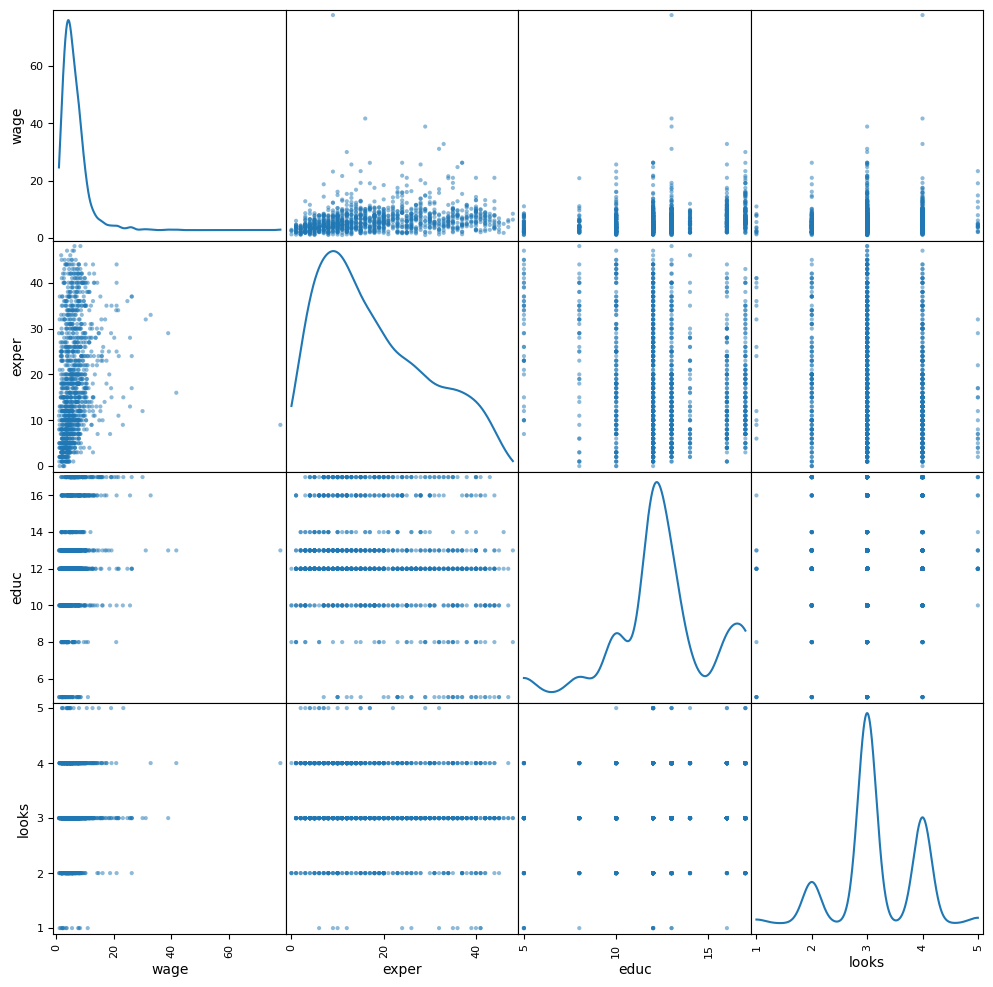

In [40]:
pd.plotting.scatter_matrix(
    df[["wage", "exper", "educ", "looks"]], figsize=(12, 12), diagonal="kde"
)
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

<Axes: >

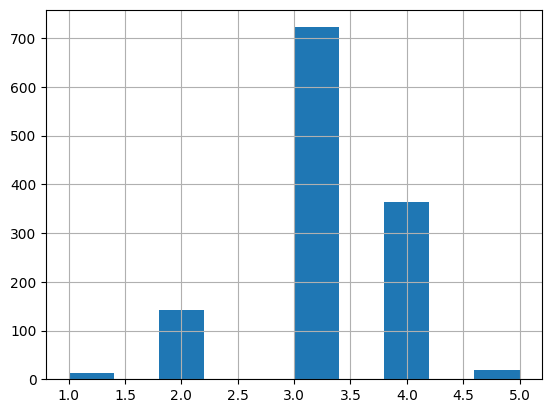

In [41]:
df["looks"].hist()

**Или сразу для всех:**

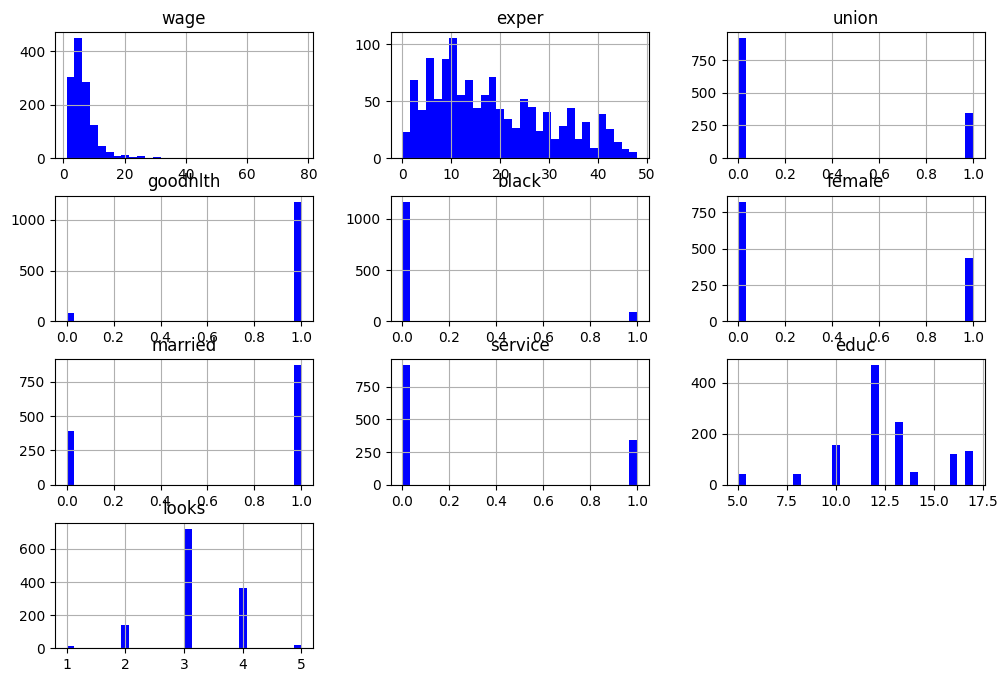

In [43]:
df.hist(color="b", bins=30, figsize=(12, 8))
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

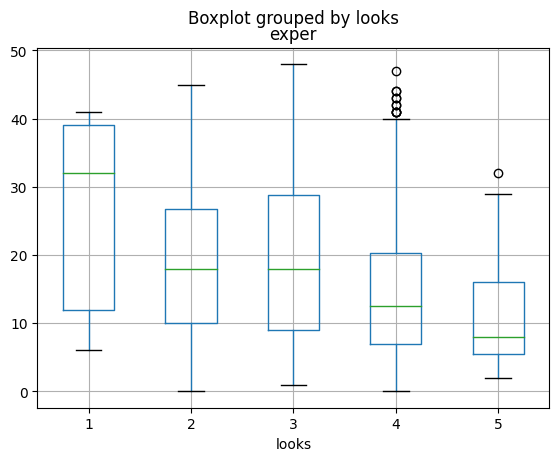

In [44]:
df.boxplot(column="exper", by="looks")
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

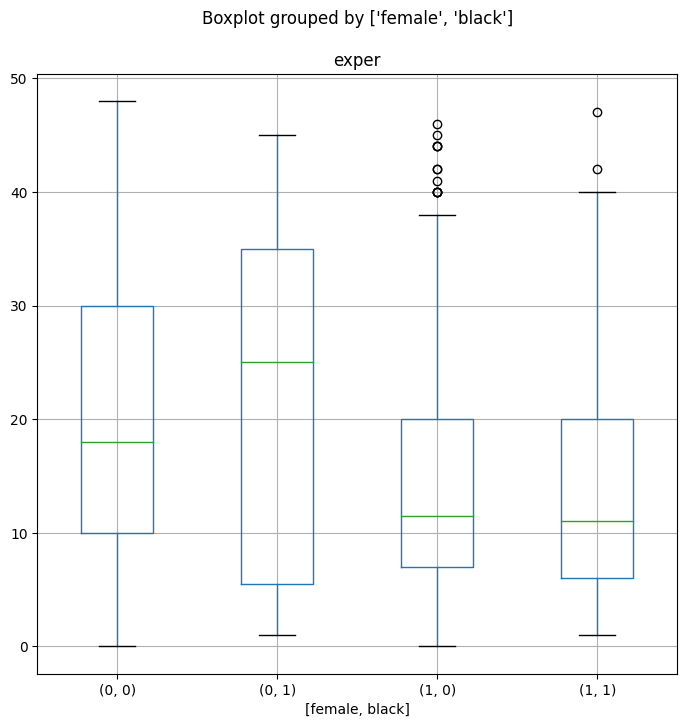

In [45]:
df.boxplot(column="exper", by=["female", "black"], figsize=(8, 8))
plt.show()